In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [13]:
cursor.execute("DROP TABLE IF EXISTS sales;")
cursor.execute("""
CREATE TABLE sales (
    order_id INTEGER,
    order_date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")
conn.commit()


In [7]:
try:
    csv_data = pd.read_csv("sales_data_sample.csv", encoding="utf-8")
except UnicodeDecodeError:
    csv_data = pd.read_csv("sales_data_sample.csv", encoding="latin1")

In [14]:
csv_data.rename(columns={
    'ORDERNUMBER': 'order_id',
    'ORDERDATE': 'order_date',
    'PRODUCTCODE': 'product',
    'QUANTITYORDERED': 'quantity',
    'PRICEEACH': 'price'
}, inplace=True)

In [15]:
csv_data[['order_id', 'order_date', 'product', 'quantity', 'price']].to_sql("sales", conn, if_exists='append', index=False)

2823


--- 1. Top 5 Products by Revenue ---

    product  total_quantity    revenue
0  S18_3232            1774  176026.63
1  S24_3856            1052  103489.89
2  S18_4600            1031  101835.00
3  S24_2300             996   99600.00
4  S18_2238             966   96300.00


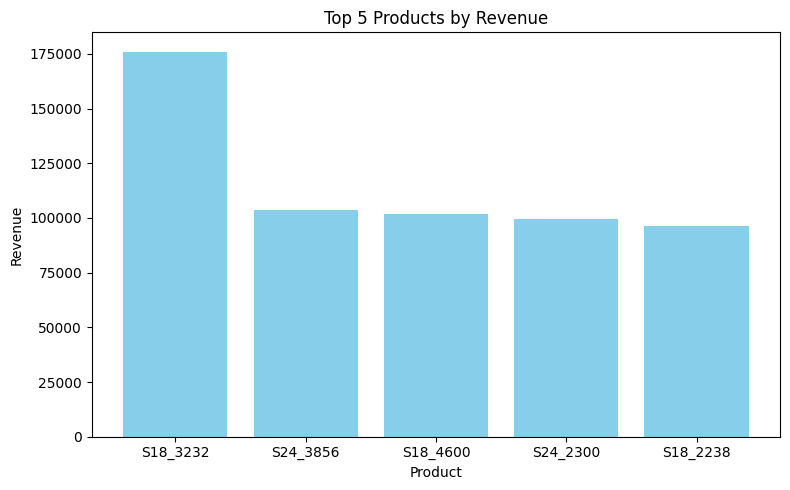

In [14]:
query1 = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 5;
"""
df1 = pd.read_sql_query(query1, conn)
print("\n--- 1. Top 5 Products by Revenue ---\n")
print(df1)

plt.figure(figsize=(8,5))
plt.bar(df1['product'], df1['revenue'], color='skyblue')
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("chart1_revenue_by_product.png")
plt.show()


--- 2. Top 5 Products by Quantity Sold ---

     product  total_quantity
0   S18_3232            1774
1   S24_3856            1052
2   S18_4600            1031
3  S700_4002            1029
4   S12_4473            1024


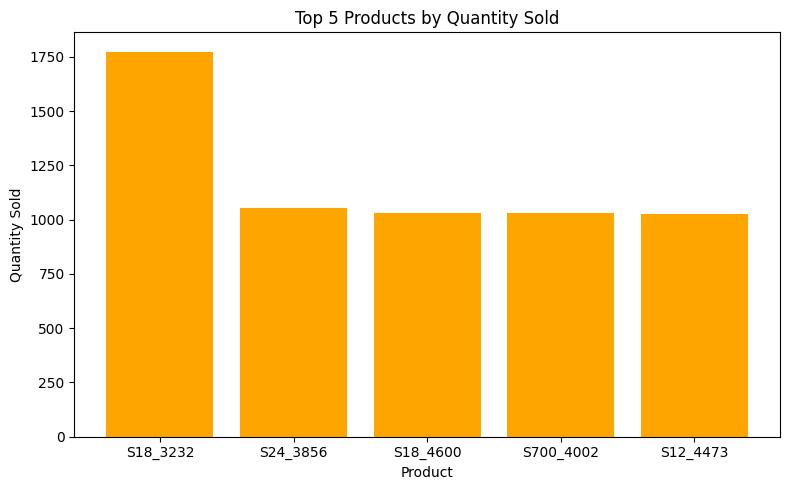

In [22]:
query2 = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity
FROM sales
GROUP BY product
ORDER BY total_quantity DESC
LIMIT 5;
"""
df2 = pd.read_sql_query(query2, conn)
print("\n--- 2. Top 5 Products by Quantity Sold ---\n")
print(df2)

plt.figure(figsize=(8,5))
plt.bar(df2['product'], df2['total_quantity'], color='orange')
plt.title("Top 5 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.savefig("chart2_top5_quantity.png")
plt.show()